In [7]:
import numpy as np

In [8]:
cd /Users/Marco/documents/CSC 478/newsgroups

/Users/Marco/Documents/CSC 478/newsgroups


In [9]:
news_test = np.loadtxt("testMatrixModified.txt").T
news_train = np.loadtxt("trainMatrixModified.txt").T

In [10]:
news_test_norm  = news_test/np.linalg.norm(news_test)
news_train_norm = news_train/np.linalg.norm(news_train)

In [11]:
test_label  = np.loadtxt("testClasses.txt")
train_label = np.loadtxt("trainClasses.txt")

In [12]:
from collections import Counter
def most_Common_list(list):
    data = Counter(list)
    return data.most_common(1)[0][0]

## __1a.__
__The classifier takes in the following parameters:__
- training data matrix
- the training labels
- the instance being to be classified
- the value of k
- the similarity measure

__It returns:__
- the predicted class
- the nearest K neighbors

In [62]:
def knn_search(instance,trainData,trainLabel,K,measure):
    if measure == 0:
        dists = np.sqrt(((trainData-instance)**2).sum(axis=1))
    elif measure == 1: 
        t_norm = np.array([np.linalg.norm(trainData[i]) for i in range(len(trainData))])
        i_norm = np.linalg.norm(instance)
        sims = np.dot(trainData,instance)/(t_norm * i_norm)
        dists = 1-sims
  
    idx = np.argsort(dists)
    neighbor_idx = idx[:K]
    neighbor_class = trainLabel[neighbor_idx]
    n = neighbor_class.T
    return most_Common_list(n[1])
# ,n[0]

In [63]:
knn_search(news_test_norm[0],news_train_norm,train_label,5,1)

1.0

## __1b.__
__The function takes in the following as parameters:__
- the K Value
- the similarity measure

It loops through all test instances and then it returns 
the ratio of correct predictions to the number of 
test instances. 

In [14]:
def accuracyTest(K,measure):
    errorCount = 0.0
    length = len(news_test)
    for i in range(length):
        classifierResult = knn_search(news_test_norm[i],news_train_norm,train_label,K,measure)
        if (classifierResult != test_label[i][1]): errorCount += 1.0
    number_correct = length - errorCount
    result = (number_correct/float(length))
    return result


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

## __1c.__
A loop that runs the accuracy function on K values ranging from 1-20. 

In [92]:
KNNe_results = []
for i in range(1,21):
    grade = accuracyTest(i,0)#Euclidean distance
    KNNe_results.append(grade)


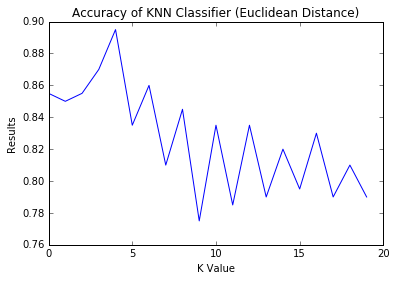

In [93]:
plt.plot(KNNe_results)
plt.xlabel('K Value')
plt.ylabel('Results')
plt.title('Accuracy of KNN Classifier (Euclidean Distance)')
plt.show()

In [94]:
KNNc_results = []
for i in range(1,21):
    grade = accuracyTest(i,1)#Cosine similarity
    KNNc_results.append(grade)


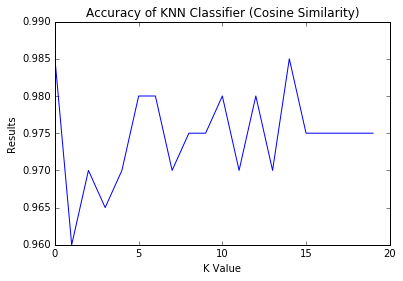

In [95]:
plt.plot(KNNc_results)
plt.xlabel('K Value')
plt.ylabel('Results')
plt.title('Accuracy of KNN Classifier (Cosine Similarity)')
plt.show()

**Processing data to convert to TFxIDF weights**

In [20]:
DT_test  = news_test[:]
DT_train = news_train[:] 

In [49]:
TD_test = DT_test.T
TD_train = DT_train.T

(5500, 200)

In [22]:
DF_test = np.array([(TD_test!=0).sum(1)]).T
DF_train = np.array([(TD_train!=0).sum(1)]).T

In [23]:
DF_test = DF_test + 1
DF_train = DF_train + 1

In [24]:
NDocs_test = len(DT_test[:,0])
NDocs_train = len(DT_train[:,0])

In [29]:
NMatrix_test = np.ones(np.shape(TD_test),dtype=float)*NDocs_test
NMatrix_train = np.ones(np.shape(TD_train),dtype=float)*NDocs_train

In [30]:
IDF_test = np.log2(np.divide(NMatrix_test,DF_test))
IDF_train = np.log2(np.divide(NMatrix_train,DF_train))

In [31]:
TD_test_tdidf=TD_test*IDF_test
TD_train_tdidf=TD_train*IDF_train

In [52]:
DT_test_tdidf=TD_test_tdidf.T
DT_train_tdidf=TD_train_tdidf.T

(800, 5500)


## __1d.__
Function to test the classifier using the TFxIDF weights.
Then I rerun the evaluation on the K values for both the Euclidean distance measure and the cosine similarity measure. 

In [34]:
def accuracyTestTFIDF(K,measure):
    errorCount = 0.0
    length = len(news_test)
    for i in range(length):
        classifierResult = knn_search(DT_test_tdidf[i],DT_train_tdidf,train_label,K,measure)
        if (classifierResult != test_label[i][1]): errorCount += 1.0
    number_correct = length - errorCount
    result = (number_correct/float(length))
    return result

In [96]:
TFIDFresultsE = []
for i in range(1,21):
    grade = accuracyTestTFIDF(i,0)#Euclidean distance
    TFIDFresultsE.append(grade)

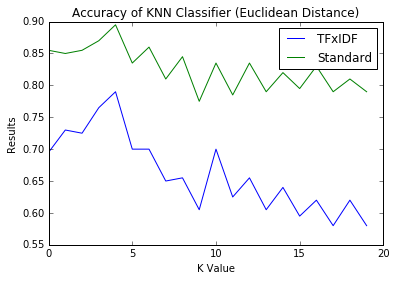

In [106]:
plt.plot(TFIDFresultsE)
plt.plot(KNNe_results)
plt.legend(['TFxIDF','Standard'])
plt.xlabel('K Value')
plt.ylabel('Results')
plt.title('Accuracy of KNN Classifier (Euclidean Distance)')
plt.show()

In [100]:
TFIDFresultsC = []
for i in range(1,21):
    grade = accuracyTestTFIDF(i,1)#Cosine similarity
    TFIDFresultsC.append(grade)

NameError: name 'TFIDresultsC' is not defined

In [102]:
TFIDFresultsC

[0.965,
 0.965,
 0.965,
 0.975,
 0.97,
 0.97,
 0.985,
 0.985,
 0.99,
 0.995,
 0.99,
 0.995,
 0.995,
 0.995,
 0.995,
 0.99,
 0.995,
 0.99,
 0.995,
 0.995]

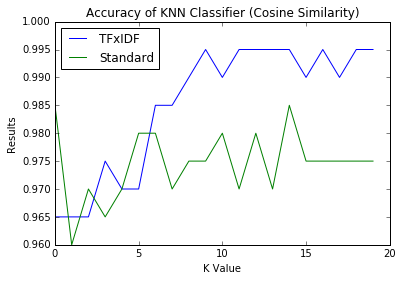

In [109]:
plt.plot(TFIDFresultsC)
plt.plot(KNNc_results)
plt.legend(['TFxIDF','Standard'],loc='upper left')
plt.xlabel('K Value')
plt.ylabel('Results')
plt.title('Accuracy of KNN Classifier (Cosine Similarity)')
plt.show()

## __1e.__
First I add up the corresponding document arrays and then I have a vector for class 0 and class 1. Then in the classifier I compare a test document to the class vectors and return the closest match.

In [57]:
class0 = np.zeros_like(DT_train_tdidf[0])
class1 = np.zeros_like(DT_train_tdidf[0])

for i in range(800):
    if train_label[i][1]==0:
        class0 = np.add(class0,DT_train_tdidf[i])
    elif train_label[i][1]==1:
        class1 = np.add(class1,DT_train_tdidf[i])

In [88]:
from scipy import spatial as sp
def rocchio_classifier(instance,trainData1,trainData2):
    s1 = sp.distance.cosine(trainData1,instance)
    s2 = sp.distance.cosine(trainData2,instance)
    if s1<s2:
        print "The predicted class is 0, the distances are class 0: %s and class 1: %s"%(s1,s2)
        return 0
    elif s2<s1:
        print "The predicted class is 1, the distances are class 0: %s and class 1: %s"%(s1,s2)
        return 1
    

In [89]:
rocchio_classifier(DT_test_tdidf[20],class0,class1)

The predicted class is 0, the distances are class 0: 0.632460256175 and class 1: 0.938841038254


0

In [90]:
def accuracyTestRocchio():
    errorCount = 0.0
    length = len(news_test)
    for i in range(length):
        classifierResult = rocchio_classifier(DT_test_tdidf[i],class0,class1)
        if (classifierResult != test_label[i][1]): errorCount += 1.0
    number_correct = length - errorCount
    result = (number_correct/float(length))
    return result

In [91]:
accuracyTestRocchio()

The predicted class is 1, the distances are class 0: 0.931940810385 and class 1: 0.739660478494
The predicted class is 0, the distances are class 0: 0.795983010099 and class 1: 0.947069860437
The predicted class is 1, the distances are class 0: 0.912112866506 and class 1: 0.90046812825
The predicted class is 1, the distances are class 0: 0.951437303364 and class 1: 0.771309768692
The predicted class is 1, the distances are class 0: 0.958057665737 and class 1: 0.820313077853
The predicted class is 0, the distances are class 0: 0.783995793265 and class 1: 0.95743007454
The predicted class is 1, the distances are class 0: 0.975537613065 and class 1: 0.862184347402
The predicted class is 1, the distances are class 0: 0.976344678128 and class 1: 0.827511352257
The predicted class is 0, the distances are class 0: 0.854446234502 and class 1: 0.910752173544
The predicted class is 1, the distances are class 0: 0.970802639767 and class 1: 0.834464539534
The predicted class is 0, the distances ar

0.98